I pledge on my honor that I have not given or received any unauthorized assistance on this assignment/examination. I further pledge that I have not copied any material from a book, article, the Internet or any other source except where I have expressly cited the source.

By filling out the following fields, you are signing this pledge. No assignment will get credit without being pledged.

Name: Tong Wu

ID: tw2906

Date: 05/31/2023


# Instructions
In this assignment, you should use this Jupyter notebook to answer the questions below. Simply type your code into embedded chunks. 

For all the programming homeworks, you should submit two UNCOMPRESSED files:
1). A report as a Jupyter notebook (extension ipynb) organized by questions, with the proper explanation for every answer
2). The same Jupyter notebook saved as an HTML or pdf file. 

From the file menu of the Jupyter notebook, you can download the Jupyter notebook and the same report as a HTML or pdf file: File --> Download as:

Failure to include the report as a Jupyter notebook or its pdf/html version will result in a deduction of 50% and 20% respectively. If you want to improve your homework, you can resubmit it until the deadline.

# Data imputation:


## 1. Download the dataset credit-data-post-import.csv, randomly split your dataset in two datasets: training (75% observations) and testing (25% observations). We'll use the training set to calibrate our model and then use the test set to evaluate how effective it is.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('./credit-data-post-import.csv')
## Split the dataset randomly into train(75%) and test(25%) with seed 4995
train_data, test_data = train_test_split(data, test_size=0.25, random_state=4995)

In [2]:
## Show the basic information of dataset and its attributes
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112500 entries, 121454 to 80027
Data columns (total 11 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   serious_dlqin2yrs                            112500 non-null  int64  
 1   revolving_utilization_of_unsecured_lines     112500 non-null  float64
 2   age                                          112500 non-null  int64  
 3   number_of_time30-59_days_past_due_not_worse  112500 non-null  int64  
 4   debt_ratio                                   112500 non-null  float64
 5   monthly_income                               90231 non-null   float64
 6   number_of_open_credit_lines_and_loans        112500 non-null  int64  
 7   number_of_times90_days_late                  112500 non-null  int64  
 8   number_real_estate_loans_or_lines            112500 non-null  int64  
 9   number_of_time60-89_days_past_due_not_worse  112500 non

In [3]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37500 entries, 56958 to 124795
Data columns (total 11 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   serious_dlqin2yrs                            37500 non-null  int64  
 1   revolving_utilization_of_unsecured_lines     37500 non-null  float64
 2   age                                          37500 non-null  int64  
 3   number_of_time30-59_days_past_due_not_worse  37500 non-null  int64  
 4   debt_ratio                                   37500 non-null  float64
 5   monthly_income                               30038 non-null  float64
 6   number_of_open_credit_lines_and_loans        37500 non-null  int64  
 7   number_of_times90_days_late                  37500 non-null  int64  
 8   number_real_estate_loans_or_lines            37500 non-null  int64  
 9   number_of_time60-89_days_past_due_not_worse  37500 non-null  int64 

## 2. Split our training and test data into 2 groups: data containing nulls and data not containing nulls on the monthly_income variable. Using only the training data not containing nulls, train on the monthly_income variable and make 'predictions' on the null data of the training and test dataset (each one independently) to impute monthly_income using a regression algorithm with the variables 'number_real_estate_loans_or_lines' and 'number_of_open_credit_lines_and_loans'. As a result, generate a new training and test datasets with data not containing nulls (as the null values were substituted by the predictions) and save them in the csv files: credit-data-trainingset.csv and credit-data-testset.csv. For this first part, the report can simply compare the number of observations of each dataset (train and test) before and after the correction of null values.


In [4]:
# Split train and test data into 2 groups #
## Data containing nulls
train_null = train_data[train_data['monthly_income'].isnull()]
test_null = test_data[test_data['monthly_income'].isnull()]
## Data not containing nulls
train_notnull = train_data[train_data['monthly_income'].notnull()]
test_notnull = test_data[test_data['monthly_income'].notnull()]

In [5]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest Model #
## Create Random Forest model
model = RandomForestRegressor(n_estimators=10000, random_state=4995)
## Split training dataset with no null value into X and Y sub-set
X_train_notnull = train_notnull[['number_real_estate_loans_or_lines', 'number_of_open_credit_lines_and_loans']]
Y_train_notnull = train_notnull['monthly_income']
## Split training dataset with null, test dataset with null into X and Y sub-set
X_train_null = train_null[['number_real_estate_loans_or_lines', 'number_of_open_credit_lines_and_loans']]
Y_train_null = train_null['monthly_income']
X_test_null = test_null[['number_real_estate_loans_or_lines', 'number_of_open_credit_lines_and_loans']]
Y_test_null = test_null['monthly_income']

In [6]:
## Train the model using train_notnull
model.fit(X_train_notnull, Y_train_notnull)

RandomForestRegressor(n_estimators=10000, random_state=4995)

In [7]:
## Use the trained model to predict the monthly income in dataset train_null
y_pred = model.predict(X_train_null)
y_pred

array([7058.96886314, 5216.38563413, 4886.89181346, ..., 6386.99713484,
       6142.77002999, 6558.58959669])

In [8]:
## Move the predicted value into train_null
train_null['monthly_income'] = y_pred
## Concat the train_null dataset with train_notnull dataset to form a full train dataset with no null values
train_nonull = pd.concat([train_notnull, train_null])
## Output the dataframe into csv file
train_nonull.to_csv('credit-data-trainingset.csv')

C:\Users\TedWu\AppData\Local\Temp\ipykernel_66604\800200633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_null['monthly_income'] = y_pred


In [9]:
## Visualise the filled train dataset
train_nonull

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
96315,0,0.207579,53,0,0.397088,12500.000000,9,0,3,0,2.0
39385,0,0.295283,55,0,0.223342,12500.000000,6,0,2,0,3.0
34349,0,0.940513,41,2,0.372414,16000.000000,8,0,1,2,4.0
117183,0,0.539597,38,0,0.632761,11580.000000,18,0,4,0,3.0
147142,0,0.035383,44,0,0.287393,12000.000000,6,0,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
120600,0,0.177224,66,0,1774.000000,6531.406035,7,0,1,0,0.0
112966,0,0.010721,65,0,95.000000,5202.855701,7,0,0,0,0.0
347,0,0.049529,61,0,542.000000,6386.997135,15,0,0,0,0.0
28209,0,0.035054,53,0,1543.000000,6142.770030,5,0,1,0,0.0


In [10]:
## Repeat the process, predict test_null and output the concated dataset
y_pred1 = model.predict(X_test_null)
Y_test_null = Y_test_null.to_frame()
test_null['monthly_income'] = y_pred1
test_nonull = pd.concat([test_notnull, test_null])
test_nonull.to_csv('credit-data-testset.csv')

C:\Users\TedWu\AppData\Local\Temp\ipykernel_66604\2423025954.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_null['monthly_income'] = y_pred1


In [11]:
## Visualise the filled test dataset
test_nonull

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
56958,1,0.956757,49,1,2.121255,700.000000,4,1,2,0,1.0
68156,0,0.000000,27,0,0.000000,0.000000,1,0,0,0,0.0
117553,0,0.137021,40,0,0.200371,23750.000000,12,0,1,0,3.0
27108,0,0.082009,49,0,0.424486,11083.000000,14,0,2,0,0.0
82089,0,0.913709,79,0,0.236353,3278.000000,4,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4675,0,0.018795,71,0,113.000000,4707.621813,5,0,0,0,0.0
129110,0,0.033048,46,0,1451.000000,7595.686083,6,0,2,0,2.0
132218,0,0.033030,38,0,3183.000000,6558.589597,6,0,1,0,0.0
75414,0,0.138374,49,0,2162.000000,7595.686083,6,0,2,0,0.0


## Report for Data Imputation

In [12]:
train_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112500 entries, 96315 to 2469
Data columns (total 11 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   serious_dlqin2yrs                            112500 non-null  int64  
 1   revolving_utilization_of_unsecured_lines     112500 non-null  float64
 2   age                                          112500 non-null  int64  
 3   number_of_time30-59_days_past_due_not_worse  112500 non-null  int64  
 4   debt_ratio                                   112500 non-null  float64
 5   monthly_income                               112500 non-null  float64
 6   number_of_open_credit_lines_and_loans        112500 non-null  int64  
 7   number_of_times90_days_late                  112500 non-null  int64  
 8   number_real_estate_loans_or_lines            112500 non-null  int64  
 9   number_of_time60-89_days_past_due_not_worse  112500 non-n

In [13]:
test_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37500 entries, 56958 to 111909
Data columns (total 11 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   serious_dlqin2yrs                            37500 non-null  int64  
 1   revolving_utilization_of_unsecured_lines     37500 non-null  float64
 2   age                                          37500 non-null  int64  
 3   number_of_time30-59_days_past_due_not_worse  37500 non-null  int64  
 4   debt_ratio                                   37500 non-null  float64
 5   monthly_income                               37500 non-null  float64
 6   number_of_open_credit_lines_and_loans        37500 non-null  int64  
 7   number_of_times90_days_late                  37500 non-null  int64  
 8   number_real_estate_loans_or_lines            37500 non-null  int64  
 9   number_of_time60-89_days_past_due_not_worse  37500 non-null  int64 


In this part, we randomly split the original dataset into training (75%) and testing dataset (25%) in order to perform the model training and predicting. Furthermore, we perform data cleaning for both subsets. We found that the dataset has NULL value in monthly income column, so we use regression algorithm, more specifictly, random forest to predict the null monthly value by inmputing "number real estate loans or lines" and "number of open credit lines and loans".

In the previous code section, the basic information of 'train_data' and 'test_data' has been shown. The 'train_data' has 112500 rows for each attributes, and for attribute 'monthly_income' it has 90231 non-null rows. For 'test_data', it has 37500 rows in total and 30038 rows for attribute 'monthly_income' with non-null values.

After implemented model and predicted the value, the predicted value has been added into the original dataset and outputed as a new csv file. By observing the information of the two new datasets with no null values, we can found that the attribute 'momthly_income' now has the same (full) number of rows compared to other attributes.

# Credit risk:
## In this second part of this exercise, you must determine whether you will give a loan to a client based on his/her default history using the variable serious_dlqin2yrs (serious delinquency rate 2 years: 1 defaults, 0 otherwise).

## 3. Using only the credit-data-trainingset.csv data, you must compare the accuracy of the following algorithms using cross-validation (cross_val_score) and select the algorithm with the highest accuracy:

## 3.1.- Logistic regression (sklearn.linear_model.LogisticRegression) using penalty (regularization) L2 

In [14]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
# Use logistic regression with penalty L2 to train the model and calculate the accuracy #
## Input the training data from the csv file
train_data = pd.read_csv('./credit-data-trainingset.csv')
## Split the training data into X and Y, where Y should be serious_dlqin2yrs and X is the remaining useful attributes
X_train = train_data.drop(["Unnamed: 0", "serious_dlqin2yrs"], axis=1)
Y_train = train_data["serious_dlqin2yrs"]

In [47]:
## Initialise logistic regression model with L2 penalty
model_lg = LogisticRegression(penalty='l2', random_state=4995, max_iter=1000)

## 3.2.- SVM (sklearn.svm.LinearSVC) using penalty (regularization) L2 

In [48]:
from sklearn.svm import LinearSVC
## Initialise SVM model with L2 penalty
model_svm = LinearSVC(penalty='l2', dual=False, random_state=4995, max_iter=1000)

## 3.3.- Neural networks

In [49]:
from sklearn.neural_network import MLPClassifier
## Initialise Neural Network model
### Two layers, with relu and adam optimizer
#model_nn = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', random_state=4995)
model_nn = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000)

## 4. Use the best model and select the best parameters using grid search (GridSearchCV).

In [50]:
from sklearn.model_selection import cross_val_score
# Select best model by using cross-validation
## Implement cross-validation
model_lg_score = cross_val_score(model_lg, X_train, Y_train, cv=10, scoring='accuracy')
model_svm_score = cross_val_score(model_svm, X_train, Y_train, cv=10, scoring='accuracy')
model_nn_score = cross_val_score(model_nn, X_train, Y_train, cv=10, scoring='accuracy')

In [51]:
## Calculate the mean accuracy for each model
lg_mean = model_lg_score.mean()
svm_mean = model_svm_score.mean()
nn_mean = model_nn_score.mean()

In [52]:
print(f"Mean accuracy of Logistic Regression: {lg_mean}")
print(f"Mean accuracy of SVM: {svm_mean}")
print(f"Mean accuracy of Neural Network: {nn_mean}")
max_accuracy = max(lg_mean, svm_mean, nn_mean)

if max_accuracy == lg_mean:
    print("Logistic Regression has the highest mean accuracy.")
elif max_accuracy == svm_mean:
    print("SVM has the highest mean accuracy.")
else:
    print("Neural Network has the highest mean accuracy.")

Mean accuracy of Logistic Regression: 0.9336711111111112
Mean accuracy of SVM: 0.9335466666666667
Mean accuracy of Neural Network: 0.9328088888888889
Logistic Regression has the highest mean accuracy.


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

# Use Grid Search to find the optimal parameter for the best model #
## Define parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.004, 0.007, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.1, 0.4, 0.7, 1, 4, 7, 10, 40, 70, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'none']
}
## Create the base model of lg
model_lg = LogisticRegression()
## Implement grid search
grid_search = GridSearchCV(estimator=model_lg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
## Run grid search
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


In [24]:
# Check out the best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)
# Check out the best score
best_score = grid_search.best_score_
print("Best score: ", best_score)

Best parameters:  {'C': 0.05, 'penalty': 'l2', 'solver': 'newton-cg'}
Best score:  0.9339822222222223


## 5. Train your best model with the training dataset (credit-data-trainingset.csv).

In [25]:
## Create lg model with the best parameters from grid search
opt_model_lg = LogisticRegression(**best_params)
## Train the model
opt_model_lg.fit(X_train, Y_train)

LogisticRegression(C=0.05, solver='newton-cg')

## 6. Test your model using the test dataset (credit-data-testset.csv) and show its accuracy.

In [26]:
from sklearn.metrics import accuracy_score
## Input the test dataset
test_data = pd.read_csv('./credit-data-testset.csv')
## Split the training data into X and Y, where Y should be serious_dlqin2yrs and X is the remaining useful attributes
X_test = test_data.drop(["Unnamed: 0", "serious_dlqin2yrs"], axis=1)
Y_test = test_data["serious_dlqin2yrs"]
## Predict the value on test set
Y_pred = opt_model_lg.predict(X_test)
## Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 93.36%


## 7. Build the ROC (include the area under the ROC curve), the cumulative response and lift curves for the 3 algorithms mentioned above. Discuss your results comparing the 3 algorithms.

In [21]:
## Fit other two models
model_svm.fit(X_train, Y_train)
model_nn.fit(X_train, Y_train)

MLPClassifier(max_iter=1000, random_state=4995)

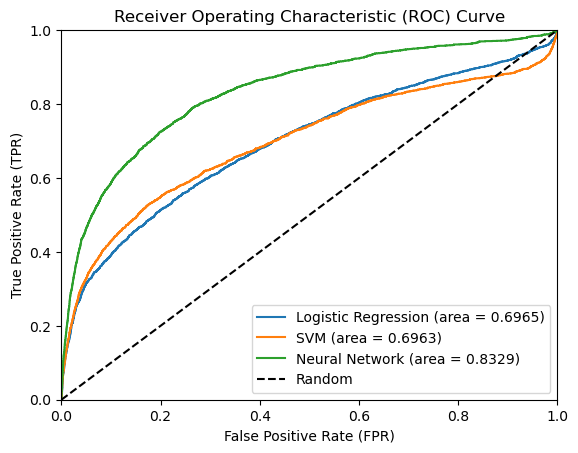

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Plot ROC Curve #
models = [opt_model_lg, model_svm, model_nn]
names = ['Logistic Regression', 'SVM', 'Neural Network']

for model, name in zip(models, names):
    if name == 'SVM':
        ## For SVM, get the distance of the samples to the hyperplane
        y_score = model.decision_function(X_test)
    else:
        ## Calculate prediction probabilities
        y_score = model.predict_proba(X_test)[:, 1]
    ## Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(Y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.4f})')
## Plot random seleciton ROC as the baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

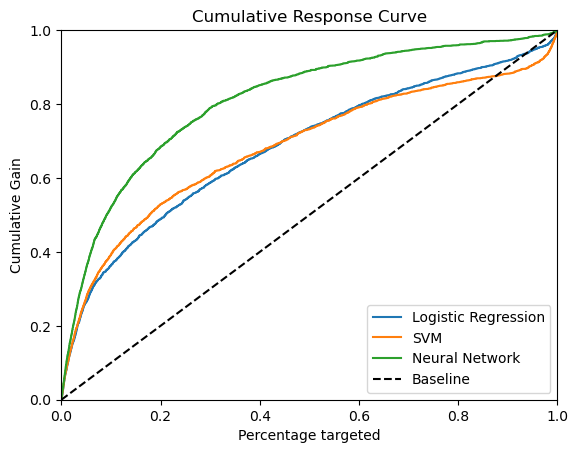

In [28]:
# Plot cumulative response curve #
def plot_cumulative_response(model, X_test, Y_test, label=None):
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test)[:, 1]
    else:
        ## If the model not use predict probability function (SVM), then calculate probability use this function
        probs = model.decision_function(X_test)
    
    sorted_indices = np.argsort(probs)[::-1]
    sorted_labels = Y_test[sorted_indices]
    total_positives = np.sum(sorted_labels)
    cumulative_positives = np.cumsum(sorted_labels)
    cumulative_gain = cumulative_positives / total_positives
    x = np.linspace(0, 1, len(cumulative_gain))
    plt.plot(x, cumulative_gain, label=label)
plot_cumulative_response(opt_model_lg, X_test, Y_test, label='Logistic Regression')
plot_cumulative_response(model_svm, X_test, Y_test, label='SVM')
plot_cumulative_response(model_nn, X_test, Y_test, label='Neural Network')
## Plot the baseline
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Percentage targeted')
plt.ylabel('Cumulative Gain')
plt.title('Cumulative Response Curve')
plt.legend(loc="lower right")
plt.show()

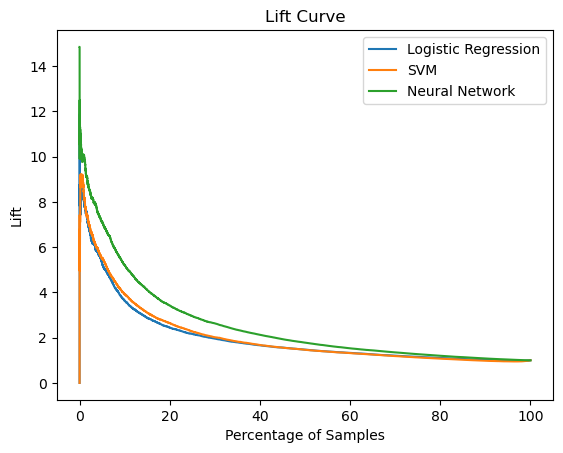

In [29]:
def plot_lift_curve(model, X_test, Y_test, label=None):
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test)[:, 1]
    else:
        ## If the model not use predict probability function (SVM), then calculate probability use this function
        probs = model.decision_function(X_test)
    sorted_indices = np.argsort(probs)[::-1]
    sorted_labels = Y_test[sorted_indices]
    num_samples = len(sorted_labels)
    num_positives = np.sum(sorted_labels)
    cumulative_positives = np.cumsum(sorted_labels)
    lift = cumulative_positives / num_positives
    cumulative_percentage = np.arange(1, num_samples + 1) / num_samples
    lift =  lift / cumulative_percentage
    x = np.linspace(0, 100, len(lift))
    plt.plot(x, lift, label=label)
plot_lift_curve(opt_model_lg, X_test, Y_test, label='Logistic Regression')
plot_lift_curve(model_svm, X_test, Y_test, label='SVM')
plot_lift_curve(model_nn, X_test, Y_test, label='Neural Network')
plt.xlabel('Percentage of Samples')
plt.ylabel('Lift')
plt.title('Lift Curve')
plt.legend()
plt.show()

## Report for Credit Risk

In this part, we implemented three models: Logistic regression, SVM and neural network. Then, using cross-validation to determine the best model and use grid search to search for the best parameter set for the best model. After that, the best model with the best parameter set was fit and tested by the test dataset, and the accuracy was output. Finally, the three models' ROC, cumulative response, and lift curves have been plotted.

From the implementation, the logistic regression has the best performance compared two the other two models, then using grid search found the optimal parameter set {'C': 0.05, 'penalty': 'l2', 'solver': 'newton-cg'}. The model has 93.40% of accuracy under the optimal parameter set. The ROC curve, cumulative response curve, and lift curve for the three models has been successfully plotted. The analysis of the performance of the three models from these curves is below.

The ROC curve is formed by connecting the True Positive Rate (TPR) and False Positive Rate(FPR) at different thresholds, with the FPR as the horizontal coordinate and the TPR as the vertical coordinate. The threshold value determines whether the predicted result is in the positive or negative category. The AUC (Area Under the ROC Curve), which is the area under the ROC curve, eliminates the effect of threshold selection and can better reflect the model's performance. In general, the closer the ROC curve is to the upper left corner, the better the performance of the model, and the larger the AUC value, the better the model's performance. In the plot generated above, all three models' ROC curves are on the upper left side, which means that models are more effective than random selection (the baseline). The AUC of logistic regression and SVM are so close, but they still have some performance differences. The SVM has the better TPR for the threshold FPR under 50%, while the logistic regression has better performance when the threshold FPR is over 50%. Noticed that the SVM and logistic regression both perform poorly when FPR is above around 90%-95%, which is worse than random selection. The neural network has the worst performance compared with other models. However, the neural network's performance is never worse than random selection, even the best when FPR is over around 90%.

The cumulative response curve mainly shows the cumulative percentage of the true target sample among the top x% of the sample after sorting the model prediction results from highest to lowest. In general, the cumulative response curve should have more gradient which can be seen as better performance. Also, close to the upper left corner shows better performance. The generated cumulative response curve is highly similar to the ROC curve. The reason for it may be that the dataset has a relatively even distribution of positive and negative cases, or the model yields relatively even probability scores when differentiating between positive and negative cases. The result of the curve is similar to the ROC curve. The logistic regression and SVM have the best performance, while the SVM has the more significant gradient in the first half percentage (0%-50%), and the logistic regression has the advantage in the later half (50%-100%). The neural network generally performs poorly, but it has the most significant gradient when the percentage is above 95%.

The lift can be interpreted as the degree of improvement in the model prediction results relative to random selection. When the percentage of samples is low, which means the possible samples are selected, the lift should be the largest and decrease with the percentage of samples increases. The lift value is how much the model is better than random selection. From the curve can analyse that the logistic regression and SVM still have the best performance. However, the logistic regression has the most prominent peak, and it is much higher than SVM's. The logistic regression is almost 12 times better than random selection when the percentage of the samples is small (below 5%). After that, both models have similar drop rates and similar values at lift. The neural network has the worst performance but has the most smooth drop rate.

In general, the logistic regression and SVM have the best and most similar performance resulting from the three graphs. However, the logistic regression is better since it has a smooth and high ROC curve and cumulative response curve and the highest peak in the lift curve. The neural network has poor performance. The result that concludes from curves is also the same as the result from the cross-validation process.
